#Распознавание деятельности человека с помощью ансамблевых моделей

 https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

#О наборе данных
База данных распознавания человеческой деятельности была построена на основе записей 30 участников исследования, выполняющих повседневную деятельность (ADL), при этом они носили закрепленный на поясе смартфон со встроенными инерционными датчиками. Цель состоит в том, чтобы классифицировать действия по одному из шести выполняемых видов деятельности.

#Описание эксперимента
Эксперименты проводились на группе из 30 добровольцев в возрасте от 19 до 48 лет. Каждый человек выполнял шесть действий (ХОДЬБА, ХОДЬБА_ВВЕРХ, ХОДЬБА_ВНИЗ, СИДЕНИЕ, СТОЯ, ЛЕЖЕНИЕ), нося смартфон (Samsung Galaxy S II) на поясе. Используя встроенный акселерометр и гироскоп, мы зафиксировали 3-осевое линейное ускорение и 3-осевую угловую скорость с постоянной частотой 50 Гц. Эксперименты записывались на видео, чтобы пометить данные вручную. Полученный набор данных был случайным образом разделен на два набора, из которых 70% добровольцев были выбраны для генерации обучающих данных и 30% — для тестовых данных.

Сигналы датчиков (акселерометра и гироскопа) предварительно обрабатывались с применением шумовых фильтров, а затем дискретизировались в скользящих окнах фиксированной ширины длительностью 2,56 секунды и перекрытием 50 % (128 показаний/окно). Сигнал ускорения датчика, который имеет компоненты гравитации и движения тела, был разделен с помощью фильтра нижних частот Баттерворта на ускорение тела и силу тяжести. Предполагается, что гравитационная сила имеет только низкочастотные составляющие, поэтому использовался фильтр с частотой среза 0,3 Гц. Из каждого окна был получен вектор признаков путем расчета переменных во временной и частотной области.





#Информация об атрибутах
Для каждой записи в наборе данных предоставляется следующее:

Трехосное ускорение по акселерометру (общее ускорение) и расчетное ускорение тела.

Трехосная угловая скорость от гироскопа.

Вектор из 561 признака с переменными во временной и частотной области.

Ярлык его активности.

Идентификатор субъекта, проводившего эксперимент.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Загрузка данных из CSV файла в DataFrame.
!wget 'https://www.dropbox.com/scl/fi/vni62m0cfunjmw9b1c6pt/human_activity.csv?rlkey=al5dji3wc9o8movr6fvieefll&st=5rt94bv7&dl=0' -O human_activity.csv
data=pd.read_csv('/content/human_activity.csv')
data

--2024-06-06 16:28:40--  https://www.dropbox.com/scl/fi/vni62m0cfunjmw9b1c6pt/human_activity.csv?rlkey=al5dji3wc9o8movr6fvieefll&st=5rt94bv7&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc226120d838b44e51431b322528.dl.dropboxusercontent.com/cd/0/inline/CUWu-1mzQzdifehBvSWCPDjVpXMUV8d0TGC3qHV5qd9HW3YVpYU-dNXM2YQ8DvMNU_Xu9dvxU7PzMrESPIJFimBsAYMB-eeeAWB3X2sJ5XaSRI4DLkIy9w2ak_WRQo8NR4pJHNwboznOOJmkzGgvzR4H/file# [following]
--2024-06-06 16:28:40--  https://uc226120d838b44e51431b322528.dl.dropboxusercontent.com/cd/0/inline/CUWu-1mzQzdifehBvSWCPDjVpXMUV8d0TGC3qHV5qd9HW3YVpYU-dNXM2YQ8DvMNU_Xu9dvxU7PzMrESPIJFimBsAYMB-eeeAWB3X2sJ5XaSRI4DLkIy9w2ak_WRQo8NR4pJHNwboznOOJmkzGgvzR4H/file
Resolving uc226120d838b44e51431b322528.dl.dropboxusercontent.com (uc226120d838b44e51431b322528.dl.dropboxusercontent.com).

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [3]:
data = data.dropna()

Выше мы можем подтвердить форму файла, содержащего 10299 строк и 562 столбца, учитывая особенности и метку.

In [4]:
data.dtypes.value_counts()

float64    561
int64        1
object       1
Name: count, dtype: int64

Минимальное и максимальное значения для столбцов с плавающей точкой составляют -1,0 и 1,0 соответственно. Однако масштабирование никогда не требуется для древовидных методов.

In [5]:
data.iloc[:,:-1].max().value_counts()

1.000000     452
0.994731       2
0.805064       1
0.908361       1
0.891736       1
            ... 
0.990935       1
0.979031       1
0.928416       1
0.848031       1
30.000000      1
Name: count, Length: 110, dtype: int64

In [6]:
data.iloc[:,:-1].min().value_counts()

-1.000000    466
-0.995377      2
-0.999996      2
-0.999893      2
-1.000000      2
            ... 
-0.999983      1
-0.943439      1
-0.998014      1
-0.999915      1
 1.000000      1
Name: count, Length: 93, dtype: int64

В типичном рабочем процессе машинного обучения нам необходимо выяснить, сбалансирован ли набор данных в метке, чтобы обеспечить максимально возможную точность.

In [7]:
data.Activity.value_counts(normalize=True)

Activity
LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: proportion, dtype: float64

Данные относительно сбалансированы, однако, чтобы уменьшить вероятность отклоненных/предвзятых прогнозов, мы сбалансируем их с помощью функции SMOTE, используя технику передискретизации. Следующим шагом будет кодирование нашей метки, поскольку модель машинного обучения может работать только с метками, содержащими целочисленные значения. представление категорий **Кодирование действий с ярлыками**

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data['Activity'])
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [9]:
data.Activity.unique()

array([2, 1, 0, 3, 4, 5])

Если у нас есть сомнения относительно того, какое закодированное число соответствует каждому действию, просто используйте функцию .inverse_transform:

In [10]:
le.inverse_transform([0,1,2,3,4,5])

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
features = data.drop(columns=['Activity'])
label = data['Activity']

Теперь пришло время выполнить процесс балансировки нашего набора данных, как я уже говорил ранее, мы будем использовать технику SMOTE:

In [13]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(features, label)

In [14]:
X_res.shape

(8442, 562)

In [15]:
y_res.value_counts()

Activity
2    1407
1    1407
0    1407
3    1407
4    1407
5    1407
Name: count, dtype: int64

Выше мы видим, что количество экземпляров увеличилось, и это связано с тем, что мы использовали технику передискретизации, которая означает добавление экземпляров к менее частым категориям, чтобы все они имели одинаковое количество. **Разделение набора данных на обучение и тестирование:**

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=42, test_size=0.2)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6753, 562), (6753,), (1689, 562), (1689,))

Давайте импортируем некоторые функции, полезные для измерения производительности обеих моделей:

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

# Моделирование **Бэггинг ансамблевых моделей**
Бэггинг, который обозначает деревья агрегирования Bootstrap, — это тип ансамбля моделей, при котором несколько деревьев решений, учитывающих часть функций и выборок набора данных, создаются и вычисляются параллельно, чтобы получить более надежную модель. и точное предсказание Алгоритм, который выделяется и, возможно, является самым популярным из ансамблей, — это традиционный случайный лес, но было бы неплохо вычислить и сравнить и другие модели. Это положило начало масштабу этого проекта, в котором первоначально мы будем сравнивать производительность двух из наиболее известные модели пакетирования настраивают гиперпараметры начальной загрузки, чтобы найти лучший для этой задачи.

#Гиперпараметры, которые мы будем настраивать, будут следующими:


1. **max_features (максимальное количество признаков для разделения)**: Этот параметр определяет количество признаков, которые модель будет учитывать при каждом разделении. Уменьшение этого значения может сделать модель более устойчивой к шуму, но при этом увеличится вероятность недообучения.

2. **max_depth (максимальная глубина дерева)**: Определяет, насколько глубоко дерево может идти в своих разбиениях. Более глубокое дерево может более точно подгоняться к обучающим данным, но также может привести к переобучению.

3. **max_samples (максимальное количество образцов для обучения каждого базового оценщика)**: Этот параметр указывает, сколько образцов будет использоваться для обучения каждого дерева. Меньшее количество образцов может сделать модель более устойчивой, но при этом может снизиться её точность.

4. **n_estimators (количество деревьев в лесу)**: Определяет количество деревьев в ансамбле. Большее количество деревьев может улучшить точность модели, но при этом увеличится вычислительная сложность.

5. **n_jobs (количество заданий, выполняемых параллельно)**: Этот параметр позволяет ускорить обучение модели за счёт параллельного выполнения заданий. Установка значения -1 означает использование всех доступных процессоров.

6. **warm_start (начать обучение с предыдущей модели)**: Если установлен в True, модель может использовать результаты предыдущего обучения для ускорения обучения новых моделей.

7. **oob_score (оценка внебаговой выборки)**: Позволяет оценить обобщающую способность модели, используя выборки, которые не включены в обучение.

8. **min_samples_split (минимальное количество образцов для разделения внутреннего узла)**: Этот параметр определяет минимальное количество образцов, необходимых для разделения внутреннего узла дерева. Увеличение этого значения может сделать модель менее склонной к переобучению.

### Random Forest

Мы оценим регрессор с 9 возрастающими числами деревьев, для каждого из которых мы вычислим oob_error (ошибку из мешка), которая, простыми словами, является мерой средней ошибки в деревьях, это поможет нам построить график и найти количество деревьев, где такая ошибка минимальна. Эта модель будет аналогична предыдущей, с таким же количеством деревьев и признаков, чтобы выбрать лучшее:

In [19]:
from sklearn.ensemble import RandomForestClassifier
RFcla = RandomForestClassifier(oob_score=True,
                               random_state=42,
                               warm_start=True,
                               n_jobs=-1)
oob_list = list()
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300]:
    RFcla.set_params(n_estimators=n_trees)
    RFcla.fit(X_train, y_train)
    oob_error = 1 - RFcla.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

# Создание DataFrame с использованием библиотеки Pandas.
rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.036724
20.0,0.030061
30.0,0.022657
40.0,0.019399
50.0,0.019251
100.0,0.017029
150.0,0.016289
200.0,0.016289
300.0,0.015697


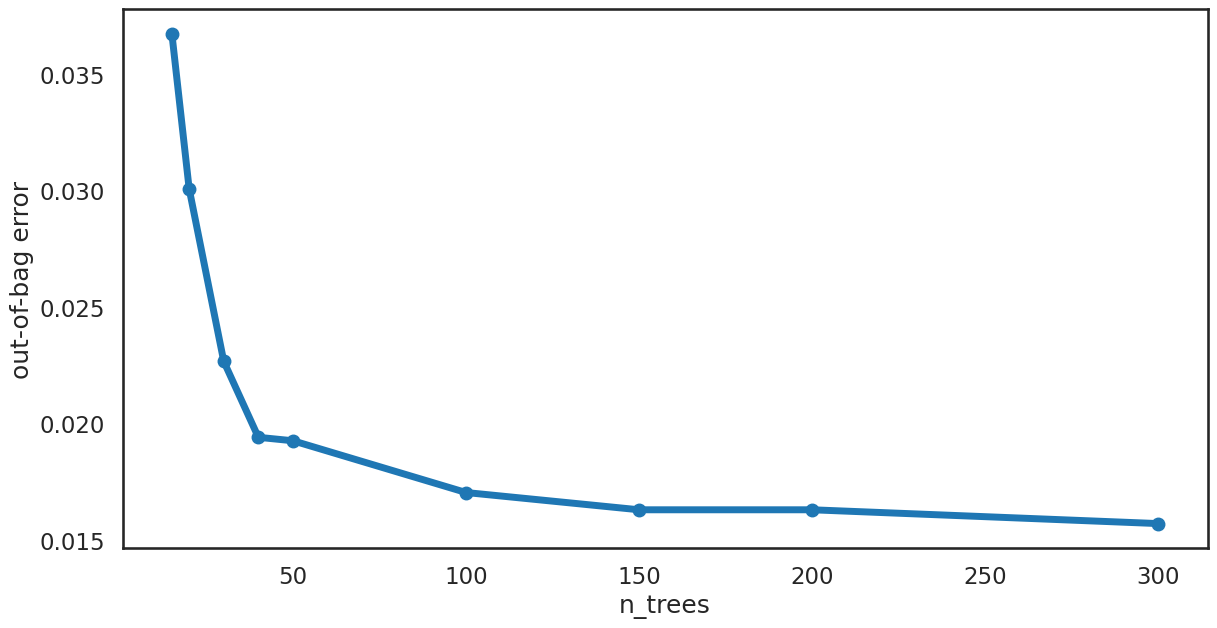

In [20]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

Как мы видим выше, кривая похожа на отрицательную экспоненциальную функцию, и, поскольку значение 50 не приводит к значительному уменьшению ошибки, но мы выберем 200, чтобы увидеть производительность лучшего, поэтому мы построим новую модель с учетом таких особенностей. следующее:

In [22]:
RFcla_200 = RandomForestClassifier(n_estimators=300
                                  ,oob_score=True
                                  ,random_state=42
                                  ,n_jobs=-1)

RFcla_200.fit(X_train, y_train)
oob_error200 = 1 - RFcla_200.oob_score_
oob_error200

0.015696727380423492

Теперь, когда мы выбрали модель с наименьшей ошибкой, мы можем изменить упомянутые гиперпараметры и посмотреть, как они влияют на производительность.

In [23]:
RFreg_200 = RandomForestClassifier(n_estimators=200,oob_score=True,random_state=42,n_jobs=-1,
                                   max_features='log2')

RFreg_200.fit(X_train, y_train)
oob_error200 = 1 - RFreg_200.oob_score_
oob_error200

0.015400562712868382

Лучшая модель соответствует первой с учетом гиперпараметров по умолчанию, поэтому мы будем использовать ее, чтобы спрогнозировать соответствующую метку для экземпляров в тестовом наборе и вычислить метрики ошибок:

In [24]:
# Использование модели для предсказания на новых данных.
label_pred_cla_rf=RFcla_200.predict(X_test)

In [25]:
print(classification_report(y_test,label_pred_cla_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       0.96      0.96      0.96       292
           2       0.96      0.96      0.96       279
           3       1.00      0.98      0.99       276
           4       0.98      0.99      0.99       275
           5       0.98      0.99      0.99       295

    accuracy                           0.98      1689
   macro avg       0.98      0.98      0.98      1689
weighted avg       0.98      0.98      0.98      1689



### Extremely Randomized Trees

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
ETcla = ExtraTreesClassifier(oob_score=True,
                             random_state=42,
                             warm_start=True,
                             n_jobs=-1,
                             bootstrap=True)
oob_list = list()
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    ETcla.set_params(n_estimators=n_trees)
    ETcla.fit(X_train, y_train)
    oob_error = 1 - ETcla.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

# Создание DataFrame с использованием библиотеки Pandas.
et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
et_oob_df

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.050792
20.0,0.035688
30.0,0.025174
40.0,0.020880
50.0,0.018066
100.0,0.015993
150.0,0.015401
200.0,0.014068
300.0,0.013031


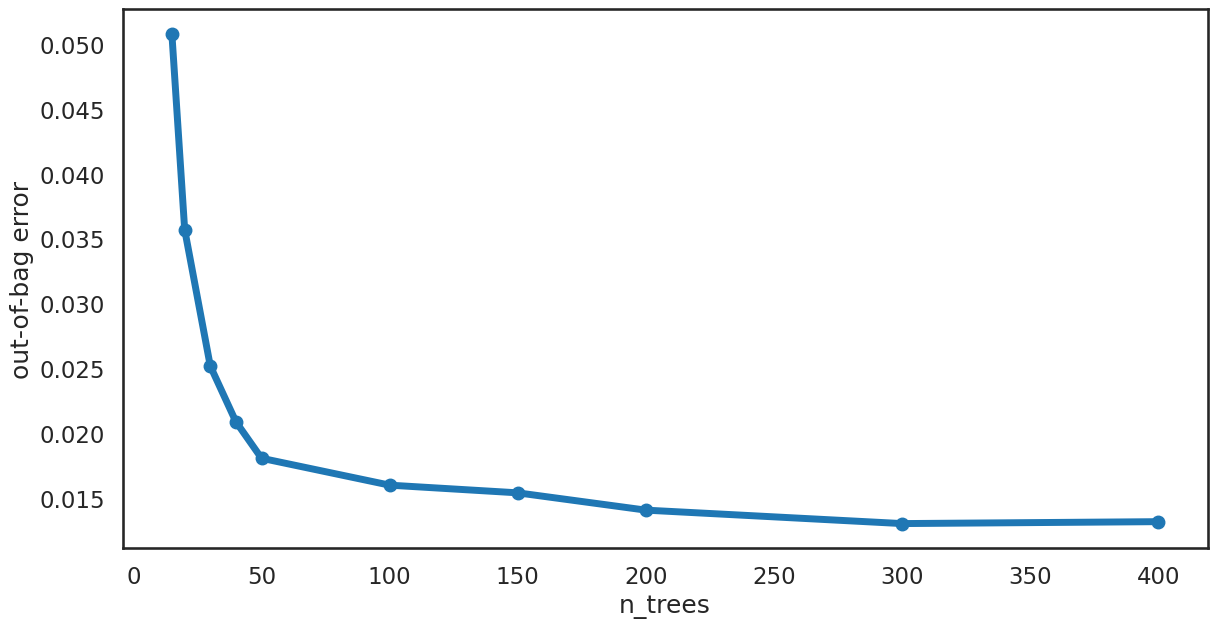

In [27]:
sns.set_context('talk')
sns.set_style('white')

ax = et_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

Как мы видим выше, кривая имела такое же поведение, как и предыдущая модель, и начиная с 150, ошибка не значительно снижается, но мы выберем 200, чтобы увидеть производительность лучшей, поэтому мы построим новую модель, учитывая такую особенности следующим образом:

In [28]:
ETcla_200 = ExtraTreesClassifier(n_estimators=200
                                  ,oob_score=True
                                  ,random_state=42
                                  ,n_jobs=-1
                                  ,bootstrap=True)

ETcla_200.fit(X_train, y_train)
oob_error200 = 1 - ETcla_200.oob_score_
oob_error200

0.01406782170887011

Теперь, когда мы выбрали модель с наименьшей ошибкой, мы можем изменить упомянутые гиперпараметры и посмотреть, как они влияют на производительность.

In [29]:
ETcla_200 = ExtraTreesClassifier(n_estimators=200,oob_score=True,random_state=42,n_jobs=-1,bootstrap=True,
                                 max_features='log2')

ETcla_200.fit(X_train, y_train)
oob_error200 = 1 - ETcla_200.oob_score_
oob_error200

0.017621797719532095

Лучшей была первая модель с гиперпараметрами по умолчанию. Давайте вычислим метрики ошибок для прогнозируемой метки экземпляров тестового набора:

In [ ]:
# Использование модели для предсказания на новых данных.
label_pred_et=ETcla_200.predict(X_test)

In [ ]:
print(classification_report(y_test,label_pred_et))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       0.98      0.94      0.96       292
           2       0.94      0.98      0.96       279
           3       1.00      0.99      0.99       276
           4       0.98      0.99      0.99       275
           5       0.99      0.99      0.99       295

    accuracy                           0.98      1689
   macro avg       0.98      0.98      0.98      1689
weighted avg       0.98      0.98      0.98      1689



Мы видели в обеих моделях настройка max_features и max_samples не оказывает существенного влияния на производительность, поэтому мы можем оставить их значения по умолчанию, то же самое с max_eep, поскольку это работает намного лучше без установки фиксированного количества разделений. Это будет учитываться. для следующих моделей, так как мы не будем устанавливать эти гиперпараметры и сосредоточимся на новом. В целом, Extra Trees немного превзошла модель Random Forest как в классификации для этого конкретного набора данных, так и в задаче, несмотря на небольшую разницу, последний широко используется и рекомендуется для упаковка.

### AdaBoost

As AdaBoost models requires the setting of 2 hyperparameters we will do so with GridSearchCV which trains the model with all possible combinations of them and finds the one with best score in a metric previously set In this case we will evaluate for 3 number of estimators and 3 learning rates, 3 folds and "accuracy" as scoring:

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

#Ada_cla = AdaBoostClassifier(random_state=42)

#tuned_parameters = {'n_estimators': [150,200,300],'learning_rate':[0.4,0.5,0.7]}

#Adacla_cv = GridSearchCV(Ada_cla, tuned_parameters,cv=3,scoring='accuracy')

Функция выполнялась слишком долго, через 35 минут она не завершила выполнение поиска по сетке, поэтому будем использовать гиперпараметры по умолчанию, однако, если вы хотите попробовать, продолжайте, но будьте немного терпеливы.

In [32]:
Ada_cla = AdaBoostClassifier(learning_rate=0.5,
                             n_estimators=200).fit(X_train, y_train)

Ada_cla.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200)

Давайте спрогнозируем метку для тестируемых экземпляров с помощью такой модели и вычислим метрики ошибок:

In [33]:
# Использование модели для предсказания на новых данных.
#label_pred_ada=Adacla_cv.predict(X_test)
# Использование модели для предсказания на новых данных.
label_pred_ada=Ada_cla.predict(X_test)
print(classification_report(y_test, label_pred_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       0.75      0.64      0.69       292
           2       0.67      0.77      0.72       279
           3       0.96      0.83      0.89       276
           4       0.96      0.67      0.79       275
           5       0.69      0.98      0.81       295

    accuracy                           0.81      1689
   macro avg       0.84      0.81      0.82      1689
weighted avg       0.84      0.81      0.81      1689



Модель AdaBoost работала плохо, достигая точности всего 74%, очевидно, поскольку наша цель состоит в том, чтобы найти наилучшую производительность, нам нужно запустить поиск по сетке, чтобы выбрать самые лучшие гиперпараметры, подходящие для этого алгоритма.

### Gradient Boosting

Особенности следующей модели были найдены ранее с помощью GridSearchCV, я не стал ее добавлять, так как ее оценка заняла много времени, поэтому я просто строю модель следующим образом:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_cla = GradientBoostingClassifier(learning_rate=0.5,
                                     max_depth=3,
                                     n_estimators=200).fit(X_train, y_train)

In [ ]:
# Использование модели для предсказания на новых данных.
label_pred_gbc=GBC_cla.predict(X_test)
print(classification_report(y_test,label_pred_gbc))

Это было намного лучше, чем предыдущий классификатор повышения, это интересно, потому что мы видим, что разница в производительности огромна и даже выше, чем у чрезвычайно рандомизированных деревьев.

### XGBoost,абсолютно превзошла существующие модели по скорости и точности, вскоре она стала настолько предпочтительной и простой в использовании, что эксперты заняли лучшие места в конкурсах по науке о данных, реализуя такую ​​модель для решения конкретных задач по сравнению с предыдущими моделями бустинга. XGBoost — независимая библиотека с функциями и возможностями, аналогичными sklearn, поэтому мы установим соответствующую библиотеку, чтобы использовать классификатор, обратите внимание, что, поскольку здесь я не буду показывать функцию GridSearch, просто используйте найденные гиперпараметры.

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

XGB_cla = XGBClassifier(learning_rate=0.5,
                        max_depth=3,
                        n_estimators=200).fit(X_train, y_train)

In [ ]:
# Использование модели для предсказания на новых данных.
label_pred_xgb=XGB_cla.predict(X_test)
print(classification_report(y_test,label_pred_xgb))

Модель обучалась значительно быстрее и достигла точности немного выше, чем при градиентном повышении. Похоже, особого улучшения нет, поскольку точности выше 99,35% будет трудно достичь, однако у нас еще есть две модели для оценки, поэтому давайте двигаться дальше.

# CatBoost
Разработанная Яндексом в 2017 году, эта модель была даже быстрее и точнее, чем XGBoost. Основное отличие этой модели заключается в том, что она реализует «симметричные деревья», что способствует сокращению времени обучения. Другим ключевым преимуществом является работа с категориальными функции, поскольку они могут быть закодированы моделью соответствующим образом, просто используя имена столбцов, что экономит время, которое было бы потрачено на разработку функций. Поскольку XGBoost для этой модели требуется предварительная установка библиотеки, чтобы использовать регрессор и классификатор, это будет сделано на следующем этапе:

In [ ]:
!pip install catboost

Гиперпараметры, которые необходимо установить, — это итерации, скорость обучения, глубина и случайное_состояние не являются обязательными. Для подбора или обучения определенной модели требуется набор для обучения и тестирования, cat_features соответствует списку, включающему имена категориальных столбцов в наборе данных, а подробный — это покажите показатели производительности после одной полной тренировки.

In [ ]:
from catboost import CatBoostClassifier

cat_model_class = CatBoostClassifier(iterations=300,
                                     learning_rate=0.7,
                                     random_seed=42,
                                     depth=3)

# Обучение модели на предоставленных данных.
cat_model_class.fit(X_train, y_train,
                    cat_features=None,
                    eval_set=(X_test, y_test),
                    verbose=False)

Давайте спрогнозируем метку для тестируемых экземпляров и вычислим метрики ошибок следующим образом:

In [ ]:
# Использование модели для предсказания на новых данных.
label_pred_cat=cat_model_class.predict(X_test)
print(classification_report(y_test,label_pred_cat))

Несмотря на то, что эта модель не превзошла две предыдущие, она достигла значительно высокой точности, даже выше 99%, при этом давайте запустим последнюю модель в превосходной степени «LightGBM».

#LightGBM
 запущенный Microsoft в 2017 году, использует новую технику под названием GOSS, которая выбирает разделение, используя все экземпляры с большими градиентами и случайную выборку экземпляров с небольшим градиентом. Как и CatBoost, эта модель может обрабатывать категориальные функции и кодировать их, просто используя имена столбцов и на данный момент это самый быстрый алгоритм обучения и вывода. Несмотря на то, что CatBoost немного уступает по точности, окончательные выборы зависят от требований пользователя. Давайте установим библиотеку Lightgbm, а затем построим классификатор следующим образом:

In [ ]:
!pip install lightgbm

In [ ]:
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [ ]:
from lightgbm import LGBMClassifier

LGBM_cla = LGBMClassifier(iterations=300,
                          learning_rate=0.4,
                          depth=3)

LGBM_cla.fit(X_train, y_train,
             eval_set=(X_test, y_test),
             verbose=False)

In [ ]:
# Использование модели для предсказания на новых данных.
label_pred_lgbm=LGBM_cla.predict(X_test)
print(classification_report(y_test,label_pred_lgbm))

Производительность была немного выше, чем у XGBoost, достигнув точности 99,36%. Было бы неплохо сравнить их, используя все значимые значения метрик в обобщающей таблице.

## Сравнение производительности На этом этапе мы покажем показатели производительности всех классификаторов, чтобы выбрать лучший в соответствии с нашими конкретными критериями.

In [ ]:
metrics = []
models = ['Random Forest', 'ERT', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'LightGBM']
predictions=[label_pred_cla_rf, label_pred_et, label_pred_ada, label_pred_gbc, label_pred_xgb,
             label_pred_cat, label_pred_lgbm]

for lab,i in zip(models, predictions):
    precision, recall, fscore, _ = score(y_test, i, average='weighted')
    accuracy = accuracy_score(y_test, i)
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
                        label_binarize(i, classes=[0,1,2,3,4,5]),
                        average='weighted')
    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, name=lab))

# Создание DataFrame с использованием библиотеки Pandas.
metrics = pd.concat(metrics, axis=1)

In [ ]:
metrics

Эта лучшая модель неверно классифицировала только 15 экземпляров из 2333, это фантастика и почти идеально. Давайте покажем несколько интересных графиков, показывающих производительность LightGBM:

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, label_pred_lgbm), display_labels=LGBM_cla.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion matrix LightGBM model')

#ROC Curve and Precision-Recall Curve:

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve
sns.set_context('talk')

In [ ]:
y_prob = LGBM_cla.predict_proba(X_test)

In [ ]:
y_test_b=label_binarize(y_test, classes=[0,1,2,3,4,5])

In [ ]:
from itertools import cycle
from sklearn.metrics import auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_class = 6
lw = 2
plt.figure(figsize=(10,8))

for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'orange', 'blue', 'black', 'red', 'green'])
for i, color in zip(range(n_class), colors):
    plt.plot(fpr[i], tpr[i], color=color,lw=lw,label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Human Activity Classification')
plt.legend(loc='best')
# Отображаем график.
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()
lines = []
labels = []
plt.figure(figsize=(10,8))

for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(y_test_b[:, i],y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_b[:, i], y_prob[:, i])

for i, color in zip(range(n_class), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label='Precision-recall for class {0} (area = {1:0.4f})'
             ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Human Activity Classification')
plt.legend(loc='lower left')
# Отображаем график.
plt.show()